In [6]:
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import random
import os

https://artsy.github.io/blog/2014/09/24/using-pattern-recognition-to-automatically-crop-framed-art/ #where i found the idea for rectangle contour detection

https://stackoverflow.com/questions/21324950/how-can-i-select-the-best-set-of-parameters-in-the-canny-edge-detection-algorith #optimizing canny edge


https://stackoverflow.com/questions/46486078/opencv-how-to-find-rectangle-contour-of-a-rectangle-with-round-corner #rectangle detection


In [7]:
img = cv.imread('ghost_stardust.jpg')

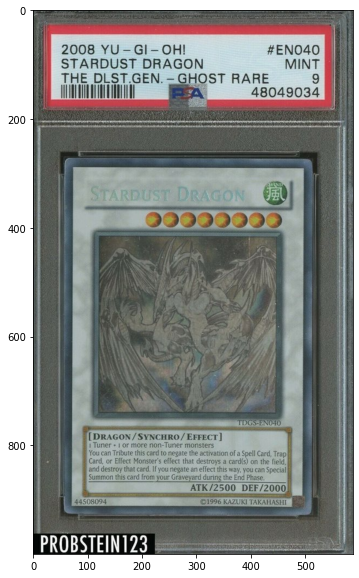

In [8]:
plt.figure(figsize = (10, 10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [9]:
img = cv.imread('ghost_stardust.jpg')
homebrew = cv.imread('homebrew.jpeg')

In [10]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray, (7,7), 0.5)
edge = cv.Canny(blur, 0, 50, 3)
contours, hierarchy = cv.findContours(edge, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

gray = cv.cvtColor(homebrew, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray, (7,7), 0.5)
edge = cv.Canny(blur, 0, 50, 3)
h_contours, h_hierarchy = cv.findContours(edge, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [11]:
all_areas = {}
for contour in contours:
    area = cv.contourArea(contour)
    all_areas[area] = contour
    
h_all_areas = {}
for contour in h_contours:
    area = cv.contourArea(contour)
    h_all_areas[area] = contour

In [12]:
sorted_areas = OrderedDict(sorted(all_areas.items(), reverse = True))
h_sorted_areas = OrderedDict(sorted(h_all_areas.items(), reverse = True))

In [13]:
sorted_contours = list(sorted_areas.values())
h_sorted_contours = list(h_sorted_areas.values())

In [14]:
for i in range(15):
    (x,y,w,h) = cv.boundingRect(sorted_contours[i])
    cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
for j in range(20):
    (x,y,w,h) = cv.boundingRect(h_sorted_contours[j])
    cv.rectangle(homebrew, (x, y), (x + w, y + h), (0, 255, 0), 2)

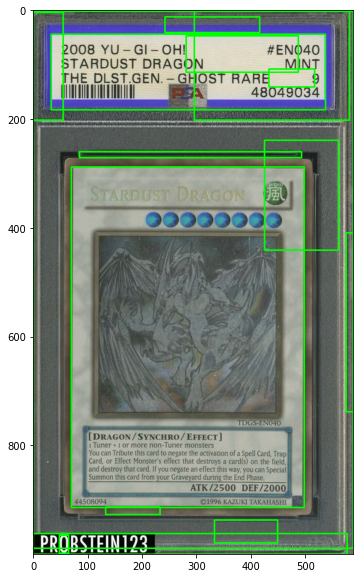

In [15]:
plt.figure(figsize = (10, 10))
plt.imshow(img)

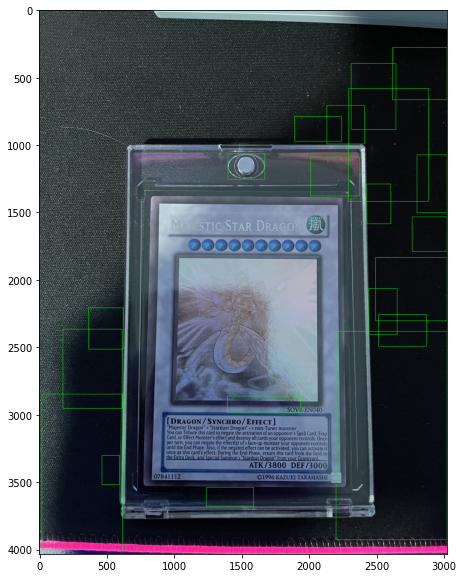

In [16]:
plt.figure(figsize = (10, 10))
plt.imshow(homebrew)

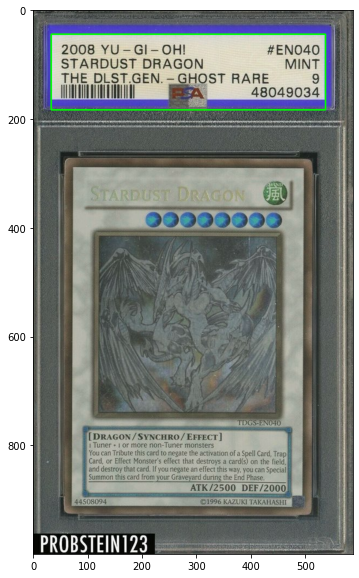

In [17]:
img = cv.imread('ghost_stardust.jpg')
(x,y,w,h) = cv.boundingRect(sorted_contours[5])
cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.figure(figsize = (10, 10))
plt.imshow(img)

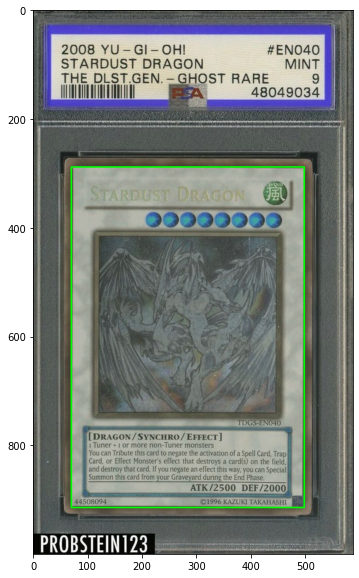

In [18]:
img = cv.imread('ghost_stardust.jpg')
(x,y,w,h) = cv.boundingRect(sorted_contours[0])
cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.figure(figsize = (10, 10))
plt.imshow(img)

In [19]:
img_path = 'TestCrop/0.jpg'
txt_path = 'TestCrop/0.txt'

In [28]:
f = open(txt_path)
txt = f.readlines()

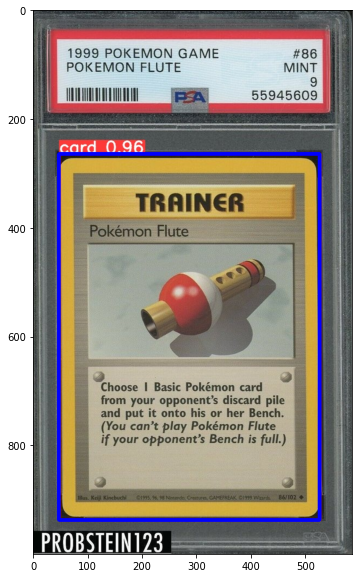

In [122]:
img = cv.imread(img_path)
dh, dw, _ = img.shape
dt = txt[0].strip('\n')
_, x, y, w, h = map(float, dt.split(' '))

x1 = int((x - w / 2) * dw)
x2 = int((x + w / 2) * dw)
y1 = int((y - h / 2) * dh)
y2 = int((y + h / 2) * dh)

if x1 < 0:
        x1 = 0
if y1 > dw - 1:
    y1 = dw - 1
if x2 < 0:
    x2 = 0
if y2 > dh - 1:
    y2 = dh - 1
#(nx,nw), (ny,nh)
cv.rectangle(img, (x1,y1), (x2,y2), (255, 0 , 0), 5)

plt.figure(figsize = (10 ,10))
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))